# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.100942e+01     7.962598e+00
 * time: 0.0034508705139160156
     1     2.945694e+01     4.507340e+00
 * time: 0.015794992446899414
     2     2.058633e+01     4.356655e+00
 * time: 0.030597925186157227
     3     1.442497e+01     3.409789e+00
 * time: 0.04515886306762695
     4     1.109888e+01     1.336843e+00
 * time: 0.05977487564086914
     5     1.056686e+01     2.780072e+00
 * time: 0.07173299789428711
     6     9.951176e+00     1.310789e+00
 * time: 0.08417081832885742
     7     9.261697e+00     1.562179e+00
 * time: 0.09635496139526367
     8     8.714705e+00     1.206599e+00
 * time: 0.10869383811950684
     9     8.503211e+00     1.025419e+00
 * time: 0.12106895446777344
    10     8.308397e+00     7.719993e-01
 * time: 0.13351702690124512
    11     8.137264e+00     6.803881e-01
 * time: 0.14598298072814941
    12     8.024625e+00     6.780621e-01
 * time: 0.15839886665344238
    13     7.941743e+00     4.508200e-01
 * t

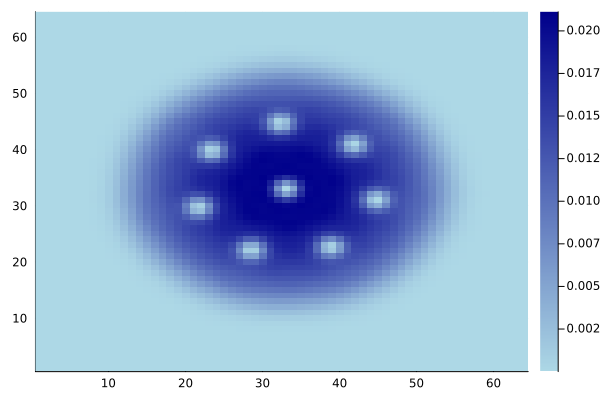

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)